##  Time Series Forecasting

#### Exchange Currency Rate Patterns


#### DataSet Used in this file is https://www.kaggle.com/maheshtaank/eurusd-daily

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# data exploration
df = pd.read_csv('eu.csv', index_col=0, parse_dates=True, skipinitialspace=True)
df

,date,open,high,low,close,volume
1971-01-04,00:00,0.53690,0.53690,0.53690,0.53690,1
1971-01-05,00:00,0.53660,0.53660,0.53660,0.53660,1
1971-01-06,00:00,0.53650,0.53650,0.53650,0.53650,1
1971-01-07,00:00,0.53680,0.53680,0.53680,0.53680,1
1971-01-08,00:00,0.53710,0.53710,0.53710,0.53710,1
...,...,...,...,...,...,...
2019-05-01,00:00,1.12148,1.12644,1.11867,1.11941,52561
2019-05-02,00:00,1.11942,1.12187,1.11703,1.11709,59203
2019-05-03,00:00,1.11710,1.13236,1.11346,1.13234,62828
2019-05-08,00:00,1.11922,1.11927,1.11892,1.11920,698


In [4]:
##couldn't get the date column so we dropped that

df.drop('date', axis='columns', inplace=True)
df.head() 

,open,high,low,close,volume
1971-01-04,0.5369,0.5369,0.5369,0.5369,1
1971-01-05,0.5366,0.5366,0.5366,0.5366,1
1971-01-06,0.5365,0.5365,0.5365,0.5365,1
1971-01-07,0.5368,0.5368,0.5368,0.5368,1
1971-01-08,0.5371,0.5371,0.5371,0.5371,1


In [5]:
df.tail()

,open,high,low,close,volume
2019-05-01,1.12148,1.12644,1.11867,1.11941,52561
2019-05-02,1.11942,1.12187,1.11703,1.11709,59203
2019-05-03,1.11710,1.13236,1.11346,1.13234,62828
2019-05-08,1.11922,1.11927,1.11892,1.11920,698
2019-05-09,1.11902,1.11985,1.11860,1.11903,12844


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12115 entries, 1971-01-04 to 2019-05-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    12115 non-null  float64
 1   high    12115 non-null  float64
 2   low     12115 non-null  float64
 3   close   12115 non-null  float64
 4   volume  12115 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 567.9 KB


In [10]:
## Checking the null values

df.isna().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [11]:
#some statistics
df.describe()

,open,high,low,close,volume
count,12115.000000,12115.000000,12115.000000,12115.000000,12115.000000
mean,1.072829,1.076753,1.068981,1.072871,20323.133884
std,0.234412,0.236481,0.232351,0.234409,37538.102171
min,0.536500,0.536500,0.536500,0.536500,1.000000
25%,0.878950,0.881650,0.875400,0.878700,231.000000
50%,1.110700,1.115000,1.107070,1.111100,1891.000000
75%,1.257600,1.263790,1.251900,1.257600,11863.000000
max,1.599500,1.603800,1.586600,1.599700,308716.000000


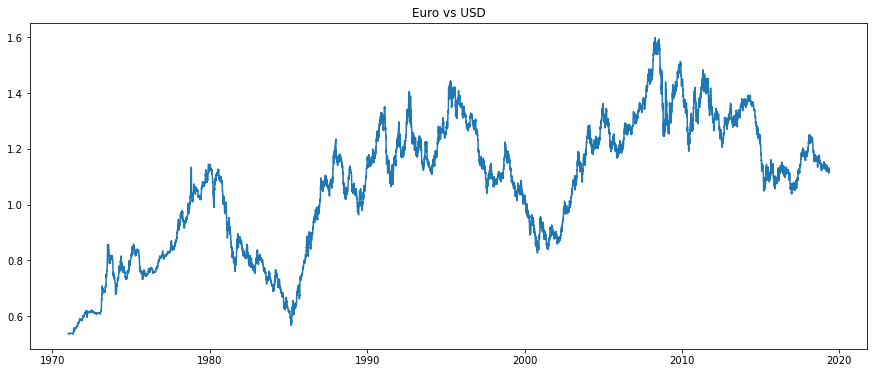

In [13]:
## Plotting the graph

plt.figure(figsize=(15,6))
plt.plot(df.close)  ##at which the value of currency exchange is closing
plt.title("Euro vs USD")

plt.show()

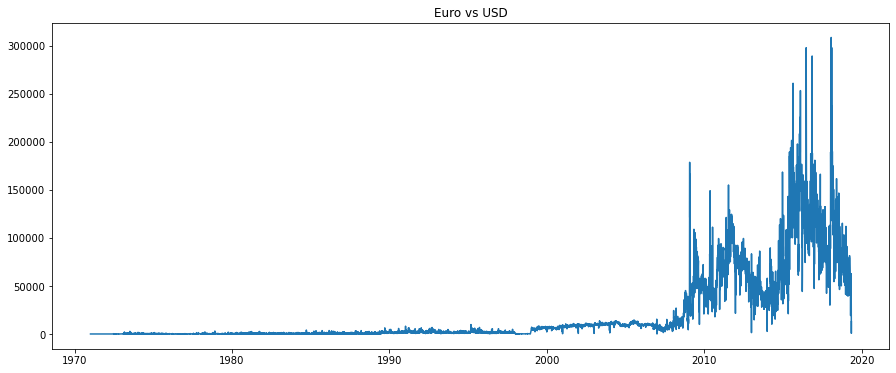

In [14]:
## Plotting the graph

plt.figure(figsize=(15,6))
plt.plot(df.volume)  
plt.title("Euro vs USD")

plt.show()

<AxesSubplot:>

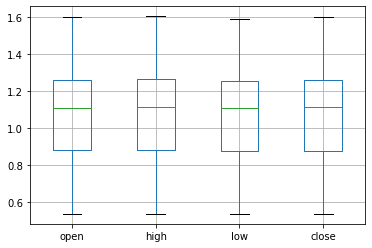

In [17]:
#boxplot
#df.boxplot()
df.drop('volume', axis = 1).boxplot()

Corr             open      high       low     close    volume
open    1.000000  0.999825  0.999827  0.999653  0.329825
high    0.999825  1.000000  0.999721  0.999826  0.331454
low     0.999827  0.999721  1.000000  0.999824  0.328456
close   0.999653  0.999826  0.999824  1.000000  0.329788
volume  0.329825  0.331454  0.328456  0.329788  1.000000


<AxesSubplot:>

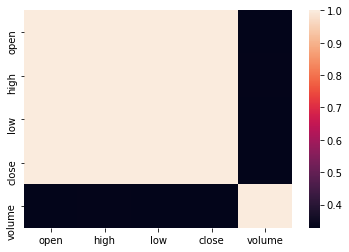

In [20]:
## getting the correlation through Heatmap
corr = df.corr()
print("Corr",corr)
sns.heatmap(df.corr())

<AxesSubplot:>

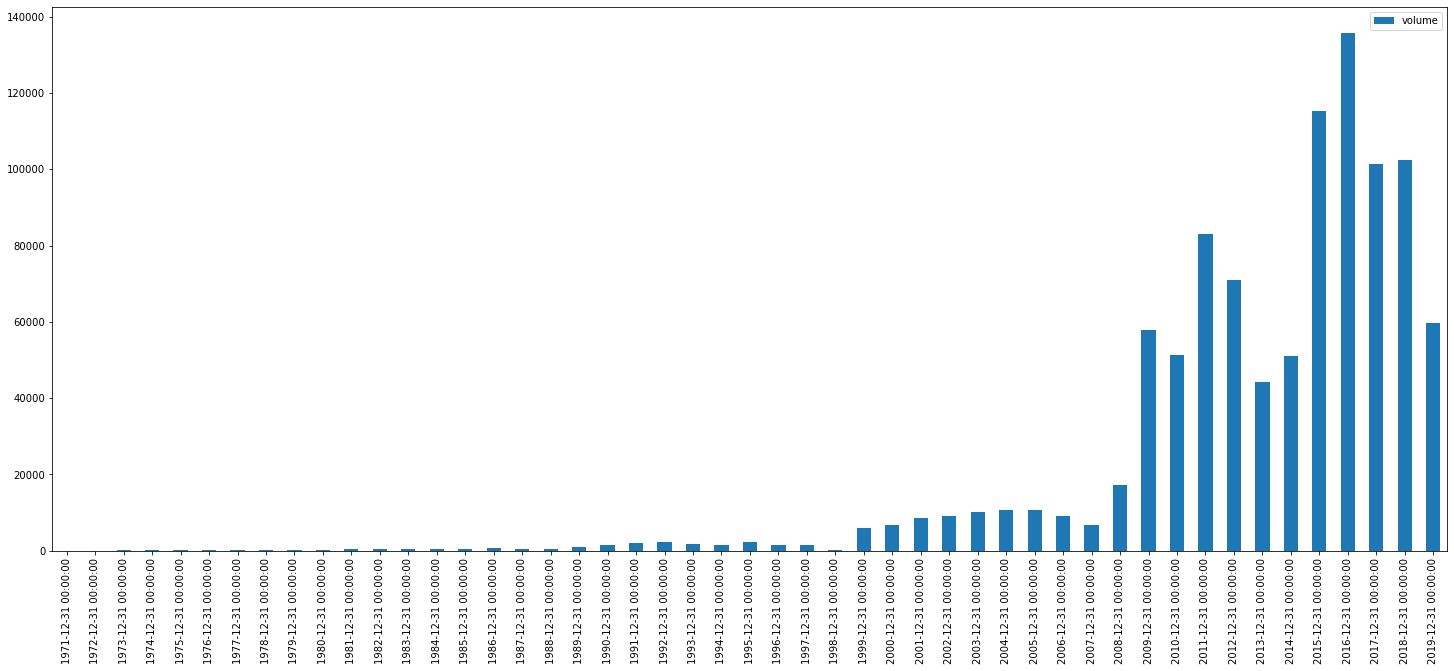

In [22]:
## resampling yearly depending on volume

df.resample("Y").mean().plot.bar(y=['volume'], figsize=[25,10])

<AxesSubplot:>

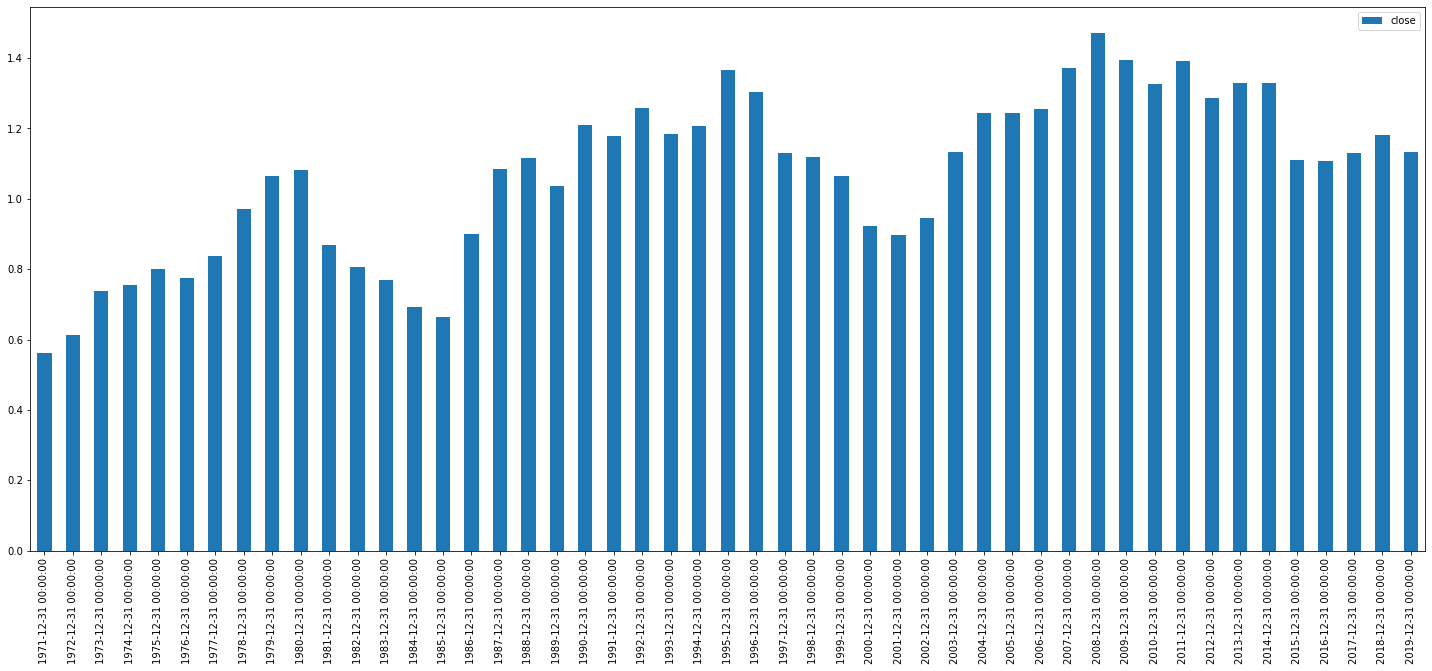

In [23]:
## resampling yearly depending on closing price

df.resample("Y").mean().plot.bar(y=['close'], figsize=[25,10])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

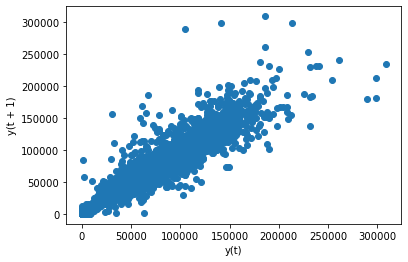

In [25]:
##using the lag plot

from pandas.plotting import lag_plot
lag_plot(df['volume'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

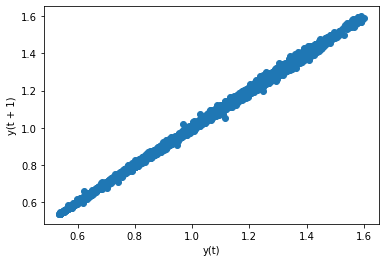

In [26]:
### before and after comparison
lag_plot(df['close'])